In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

# Importation

In [75]:
data = pd.read_csv("heart.csv")

In [78]:
print(f"La taille : {data.shape}\n")
print(f"Les premières lignes :\n\n {data.head()}\n")

La taille : (303, 14)

Les premières lignes :

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  



In [86]:
data["target"] = data["target"].apply(lambda x: "presence" if x==1 else "no presence")

In [87]:
print(f"Le type des variables :\n\n {data.dtypes}\n")
print(f"La liste des valeurs manquantes :\n\n {data.isnull().sum()}")

Le type des variables :

 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target       object
dtype: object

La liste des valeurs manquantes :

 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Visualisation

In [88]:
print(f"Le  nombre d'éléments pour chaque classe :\n\n {data['target'].value_counts()}")

Le  nombre d'éléments pour chaque classe :

 target
presence       165
no presence    138
Name: count, dtype: int64


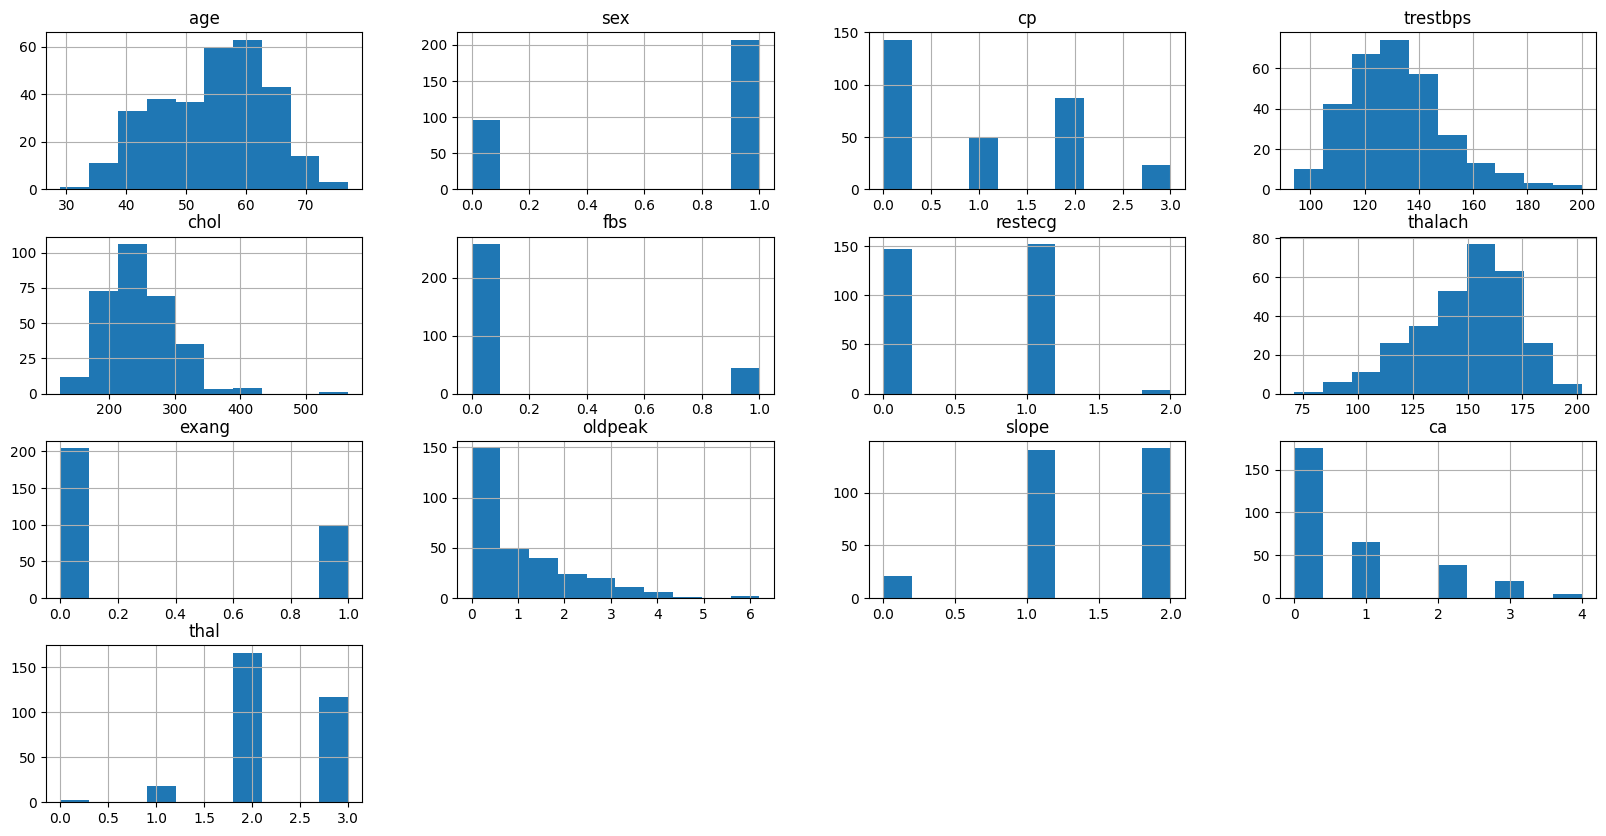

In [93]:
_ = data.hist(figsize=(20, 10))  #histogramme des variables explicatives

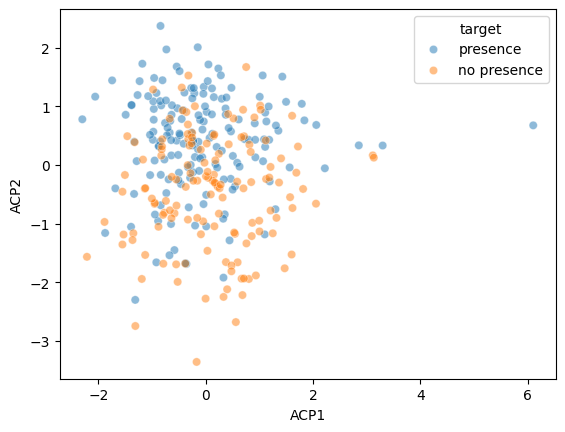

In [99]:
X = data.loc[:, :"thal"]

pca = PCA(2, whiten=True)
pca.fit(X)

trans = pca.transform(X)

X['ACP1'] = trans[:,0]
X['ACP2'] = trans[:,1]
X['target'] = data[['target']]

_ = sns.scatterplot(data=X,x='ACP1',y='ACP2',hue='target',alpha=0.5)

# Apprentissage supervisé

In [101]:
# 80% train et 20% test
data_train, data_test, target_train, target_test = train_test_split(data.loc[:, :"thal"], data[["target"]], test_size = 0.3, random_state=0)

print(f"Données d'entraînement de taille {data_train.shape}")
print(f"Données de test de taille {data_test.shape}")

Données d'entraînement de taille (212, 13)
Données de test de taille (91, 13)


In [102]:
# Normalisation des variables
norm = StandardScaler()
norm.fit(data_train)
data_train = pd.DataFrame(norm.transform(data_train), columns = data_train.columns)
data_test = pd.DataFrame(norm.transform(data_test), columns = data_test.columns)

# Méthode du plus proche voisin

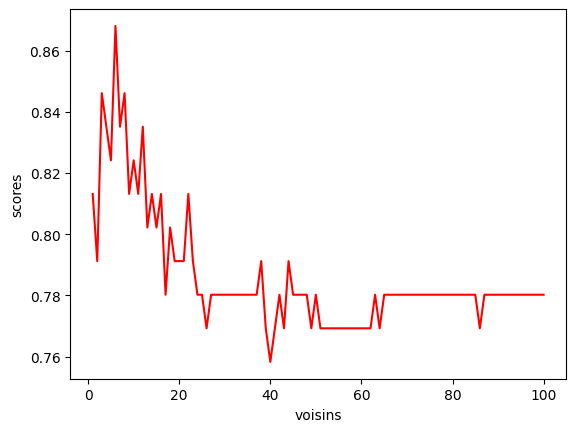

In [114]:
# Chercher le meilleur k qui donne des bons scores
scores = []
# Pour chaque voisin k variant de 1 à 100, on sauvegarde le score
for k in range(1,101):
    modele = KNeighborsClassifier(k)
    modele.fit(data_train,np.ravel(target_train))
    scores.append(modele.score(data_test,target_test)) 

n = range(1,101)
plt.plot(n,scores,'r')
plt.xlabel("voisins")
plt.ylabel("scores")
plt.show()

In [109]:
s = scores.index(max(scores))
print(f"Le meilleur score est : {s+1} qui est à l'indice {s} dans la liste des scores")

Le meilleur score est : 6 qui est à l'indice 5 dans la liste des scores


In [110]:
knn_modele = KNeighborsClassifier(n_neighbors=6)
knn_modele.fit(data_train,np.ravel(target_train))
knn_prediction = knn_modele.predict(data_test)
print(f"Score de train : {knn_modele.score(data_train,target_train)}")
print(f"Score de test : {knn_modele.score(data_test,target_test)}") 

Score de train : 0.8349056603773585
Score de test : 0.8681318681318682


<Axes: >

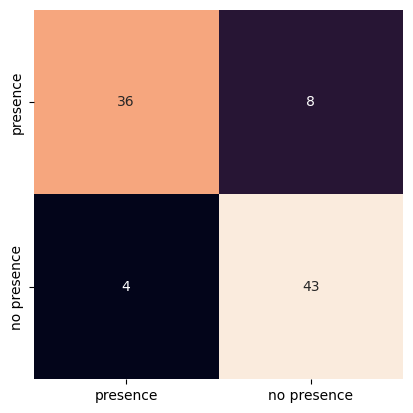

In [123]:
sns.heatmap(confusion_matrix(target_test, knn_prediction), square=True, annot=True, cbar=False
            , xticklabels=['presence','no presence']
            , yticklabels=['presence','no presence'])

# Pickling

In [125]:
pickle.dump(knn_modele, open('knn_model.pkl','wb'))
pickle.dump(norm, open('scaling.pkl','wb'))